In [92]:
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [35]:
data_df = pd.read_csv(Path('Resources/crypto_data.csv'))

In [36]:
data_df.copy()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [37]:
df = data_df[data_df['IsTrading'] == True] 
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [38]:
crypto_df = df.drop("IsTrading", axis=1).copy()
y_train = df["IsTrading"]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [39]:
crypto_df .isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [40]:
crypto_df.dropna(inplace=True)
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [41]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined'] != 0]
crypto_df.head(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
13,ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [42]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
coin_name_df = crypto_df[['CoinName']]

coin_name_df

,CoinName
0,42 Coin
2,404Coin
5,EliteCoin
7,Bitcoin
8,Ethereum
...,...
1238,ZEPHYR
1242,Gapcoin
1245,Beldex
1246,Horizen


In [43]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df = crypto_df.drop(columns=['CoinName'])
crypto_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [52]:
#Convert categorical data to numeric 
crypto_df = crypto_df.drop(columns=['Unnamed: 0'])
Categ_df=pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
Categ_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_0,Algorithm_1,Algorithm_2,Algorithm_3,Algorithm_4,Algorithm_5,Algorithm_6,Algorithm_7,...,ProofType_16,ProofType_17,ProofType_18,ProofType_19,ProofType_20,ProofType_21,ProofType_22,ProofType_23,ProofType_24,ProofType_25
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Creating an instance of LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(crypto_df['Algorithm'])
crypto_df['Algorithm'] = le.transform(crypto_df['Algorithm'])

le.fit(crypto_df['ProofType'])
crypto_df['ProofType'] = le.transform(crypto_df['ProofType'])


crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,53,16,4.199995e+01,4.200000e+01
2,53,16,1.055185e+09,5.320000e+08
5,67,16,2.927942e+10,3.141593e+11
7,47,13,1.792718e+07,2.100000e+07
8,20,13,1.076842e+08,0.000000e+00
...,...,...,...,...
1238,47,2,2.000000e+09,2.000000e+09
1242,53,16,1.493105e+07,2.500000e+08
1245,10,13,9.802226e+08,1.400223e+09
1246,18,13,7.296538e+06,2.100000e+07


In [54]:
# Before proceeding, convert 'TotalCoinSupply' to a float:
crypto_df['TotalCoinSupply'] = crypto_df['TotalCoinSupply'].astype(float)

In [55]:
# Standardize data
scaler = StandardScaler()

crypto_scaled = scaler.fit_transform(crypto_df)
crypto_scaled

array([[ 0.39335561,  0.8871567 , -0.11674788, -0.15286468],
       [ 0.39335561,  0.8871567 , -0.09358885, -0.14499604],
       [ 1.21439604,  0.8871567 ,  0.52587231,  4.4937636 ],
       ...,
       [-2.12841143,  0.00878917, -0.09523411, -0.13215444],
       [-1.65924547,  0.00878917, -0.11658774, -0.15255408],
       [ 0.39335561, -1.45515672, -0.11674507, -0.15284989]])

In [56]:
# Applying PCA to reduce dimensions

# Initialize PCA model
pca = PCA(n_components=3)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_scaled)

In [67]:
# Transform PCA data to a DataFrame
crypto_df_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2","principal component 3"]
)
crypto_df_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.412665,0.823150,0.357227
1,-0.391306,0.827873,0.358336
2,3.143152,2.186748,0.487273
3,-0.190301,-0.003829,-0.043688
4,-0.051013,-1.161387,1.020473


In [58]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.43456239, 0.28670335, 0.20580514])

In [78]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=40)

In [79]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_df_pca)

In [80]:
# The dataset has 2 columns
tsne_features.shape

(533, 2)

In [81]:
# Prepare to plot the dataset

# The first column of transformed features
crypto_df_pca['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_df_pca['y'] = tsne_features[:,1]

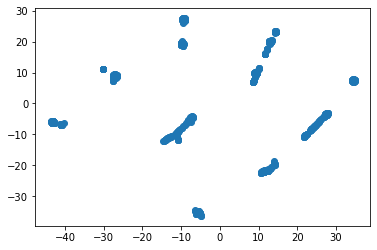

In [82]:
#Visualize the clusters
plt.scatter(crypto_df_pca['x'], crypto_df_pca['y'])
plt.show()

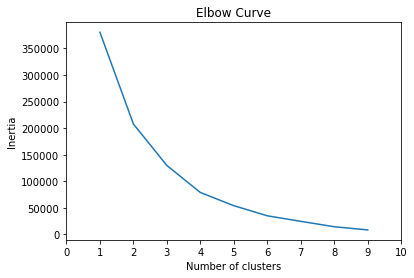

In [83]:
# Finding the best value for k
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_df_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [103]:
# Initialize the K-Means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(crypto_df_pca)

# Predict clusters
predictions = model.predict(crypto_df_pca)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df = crypto_df.join(crypto_df_pca)
clustered_df['CoinName'] = coin_name_df['CoinName']
clustered_df['Class'] = predictions
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,x,y,CoinName,Class
0,53,16,4.199995e+01,4.200000e+01,-0.412665,0.823150,0.357227,-7.117922,-4.245447,42 Coin,0
2,53,16,1.055185e+09,5.320000e+08,3.143152,2.186748,0.487273,14.219421,-19.685535,404Coin,0
5,67,16,2.927942e+10,3.141593e+11,-0.219679,0.253752,-0.280044,24.418501,-7.325879,EliteCoin,0
7,47,13,1.792718e+07,2.100000e+07,-0.011450,-1.504754,1.335799,10.721462,-22.358713,Bitcoin,1
8,20,13,1.076842e+08,0.000000e+00,-0.048798,-1.160925,1.020929,-9.513438,19.521999,Ethereum,2


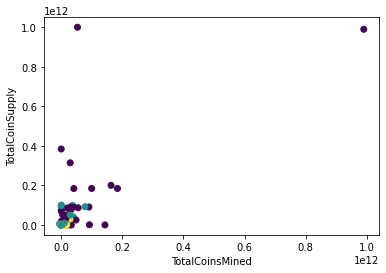

In [104]:
#Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
plt.scatter(clustered_df['TotalCoinsMined'], clustered_df['TotalCoinSupply'], c=clustered_df['Class'])
plt.xlabel('TotalCoinsMined')
plt.ylabel('TotalCoinSupply')
plt.show()
